In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 2060
Using device: cuda


In [2]:
import pandas as pd
import numpy as np
import mne
import os
import matplotlib.pyplot as plt

In [45]:
from eeg_lib.commons.constant import DATASETS_FOLDER
from eeg_lib.data.data_loader.EEGDataExtractor import EEGDataExtractor
from eeg_lib.models.similarity.centroids import SimilarityCentroidsVerifier

In [4]:
DATA_DIR = f"{DATASETS_FOLDER}/Kolory/"

extractor = EEGDataExtractor(data_dir=DATA_DIR)
eeg_df, participants_info = extractor.extract_dataframe()

Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/011595b1@1651.fif...
    Range : 0 ... 207624 =      0.000 ...   830.496 secs
Ready.
Reading 0 ... 207624  =      0.000 ...   830.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter par

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/011595b1@1651.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/022e8467@1910.fif...
    Range : 0 ... 212349 =      0.000 ...   849.396 secs
Ready.
Reading 0 ... 212349  =      0.000 ...   849.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper tra

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/022e8467@1910.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/06f240e9@1215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/25d0bdb3@1318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/2718372d@1400.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

    Range : 0 ... 206649 =      0.000 ...   826.596 secs
Ready.
Reading 0 ... 206649  =      0.000 ...   826.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/2882ae26@1441.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/3033b74a@1626.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/36eea4bb@1519.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/39285860@1825.fif...
    Range : 0 ... 193174 =      0.000 ...   772.696 secs
Ready.
Reading 0 ... 193174  =      0.000 ...   772.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter par

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/39285860@1825.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/446b3735@1618.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/46607ce4@1717.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/541c91f2@1456.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/548fd734@1628.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/54e60118@1339.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif...
    Range : 0 ... 202024 =      0.000 ...   808.096 secs
Ready.
Reading 0 ... 202024  =      0.000 ...   808.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter par

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/8dca0725@1418.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/90441f44@1643.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/9e8bae0e@1828.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Ready.
Reading 0 ... 215024  =      0.000 ...   860.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 d

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/b34b1427@0906.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e08138e2@1731.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e283301e@1606.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/e43a9f9f@0941.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

Ready.
Reading 0 ... 253624  =      0.000 ...  1014.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 d

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/f82b5699@1757.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _i

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib/data/datasets/Kolory/ffae50df@1712.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


In [47]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from eeg_lib.data.ProxyDataset import ProxyDataset
from eeg_lib.models.verification.EEGnet import EmbeddingEEGNet
from eeg_lib.losses.ProxyNCALoss import ProxyNCALoss
from eeg_lib.utils.visualisations import plot_tsne

import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

In [8]:
eeg_df.head()

,participant_id,epoch,label
0,011595b1@1651,"[[1.5994905899983496e-06, 4.660259780289654e-0...",gray
1,011595b1@1651,"[[3.2936710911247503e-06, 3.745427511069207e-0...",green
2,011595b1@1651,"[[4.327731927482567e-06, 2.515285592381088e-06...",gray
3,011595b1@1651,"[[1.7759480686267016e-06, -3.0099938072414544e...",red
4,011595b1@1651,"[[4.0924612078715145e-06, 4.532130983695527e-0...",gray


In [9]:
X = eeg_df["epoch"].values
y = eeg_df["participant_id"].values

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [12]:
batch_size = 16
num_epochs = 20
learning_rate = 0.005

In [13]:
dataset = ProxyDataset(X_train,y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [14]:
model = EmbeddingEEGNet(cnn_temp_filt=16).to(device)
proxy_loss_fn = ProxyNCALoss(len(np.unique(y_encoded)),32).to(device)

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\eeg_lib\losses\ProxyNCALoss.py:10: FutureWarning: `nn.init.kaiming_normal` is now deprecated in favor of `nn.init.kaiming_normal_`.
  nn.init.kaiming_normal(self.proxies.weight, mode='fan_out')


In [15]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    for data, label in dataloader:
        # print(data.shape)
        data = data.to(device)
        label = label.to(device).long()
        optimizer.zero_grad()
        data_embedd = model(data)
        
        loss = proxy_loss_fn(data_embedd, label)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            w = model.cnnDepth.weight
            norm = w.norm(2, dim=0, keepdim=True).clamp(min=0.5)
            desired = torch.clamp(norm, max=1.0)
            model.cnnDepth.weight.copy_(w * (desired / norm))
        
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

C:\Users\JS\Desktop\Neuron\NeuroGuard\artificial-intelligence\venv\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(


Epoch 1/20, Loss: 1152.9333832263947
Epoch 2/20, Loss: 1125.5398547649384
Epoch 3/20, Loss: 1106.7048139572144
Epoch 4/20, Loss: 1082.5608077049255
Epoch 5/20, Loss: 1067.9296684265137
Epoch 6/20, Loss: 1057.2681691646576
Epoch 7/20, Loss: 1050.0706288814545
Epoch 8/20, Loss: 1046.4754939079285
Epoch 9/20, Loss: 1038.5886497497559
Epoch 10/20, Loss: 1035.9337356090546
Epoch 11/20, Loss: 1033.1520111560822
Epoch 12/20, Loss: 1029.5600457191467
Epoch 13/20, Loss: 1027.664986371994
Epoch 14/20, Loss: 1024.6735622882843
Epoch 15/20, Loss: 1022.0795726776123
Epoch 16/20, Loss: 1020.8541359901428
Epoch 17/20, Loss: 1019.8485679626465
Epoch 18/20, Loss: 1016.6509864330292
Epoch 19/20, Loss: 1017.2229175567627
Epoch 20/20, Loss: 1013.7761733531952


In [19]:
model.to('cpu')

EmbeddingEEGNet(
  (cnnTemp): Conv2d(1, 16, kernel_size=(1, 64), stride=(1, 1), padding=same)
  (batchNorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnnDepth): Conv2d(16, 32, kernel_size=(2, 1), stride=(1, 1), padding=valid)
  (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgPool1): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
  (dropout1): Dropout(p=0.5, inplace=False)
  (cnnSeparable): Conv2d(32, 16, kernel_size=(1, 16), stride=(1, 1), padding=same)
  (batchNorm3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgPool2): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
  (dropout2): Dropout(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1104, out_features=32, bias=True)
  (elu): ELU(alpha=1.0)
)

In [20]:
embeddings = []

In [21]:
with torch.no_grad():
    for epoch in X_train:
        embeddings.append(model(torch.tensor(epoch, dtype=torch.float, requires_grad=False).unsqueeze(0).unsqueeze(0)))

In [30]:
test_embeddings = []

In [32]:
with torch.no_grad():
    for epoch in X_test:
        test_embeddings.append(model(torch.tensor(epoch, dtype=torch.float, requires_grad=False).unsqueeze(0).unsqueeze(0)))

## Visualization

In [33]:
tsne = TSNE(n_components=2, random_state=42)

In [34]:
embd = torch.stack(embeddings).reshape((np.array(embeddings).shape[0],32)).numpy()

In [37]:
embd_test = torch.stack(test_embeddings).reshape((1392,32)).numpy()

In [38]:
combined_embeddings = np.concatenate((embd, embd_test), axis=0)

In [39]:
reduced_combined = tsne.fit_transform(combined_embeddings)

In [40]:
train_reduced = reduced_combined[:embd.shape[0]]
test_reduced = reduced_combined[embd.shape[0]:]

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
train_reduced_normalized = scaler.fit_transform(train_reduced)
test_reduced_normalized = scaler.transform(test_reduced)

In [42]:
custom_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
                 '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
                 '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
                 '#000075', '#808080', '#ffffff', '#000000', '#a9a9a9', '#ff69b4',
                 '#b0e0e6', '#32cd32', '#ff4500', '#da70d6', '#ff1493', '#7fffd4']
cmap = ListedColormap(custom_colors[:30])

In [43]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y_train)
test_labels_encoded = label_encoder.transform(y_test)

In [44]:
unique_ids = np.unique(y_train)
handles = []
num_ids = len(unique_ids)
for uid in unique_ids:
    encoded_value = label_encoder.transform([uid])[0]
    color = cmap(encoded_value / num_ids)
    patch = mpatches.Patch(color=color, label=uid)
    handles.append(patch)

In [46]:
centroid_verifier = SimilarityCentroidsVerifier(train_reduced_normalized, labels_encoded)
centroids = centroid_verifier.centroids

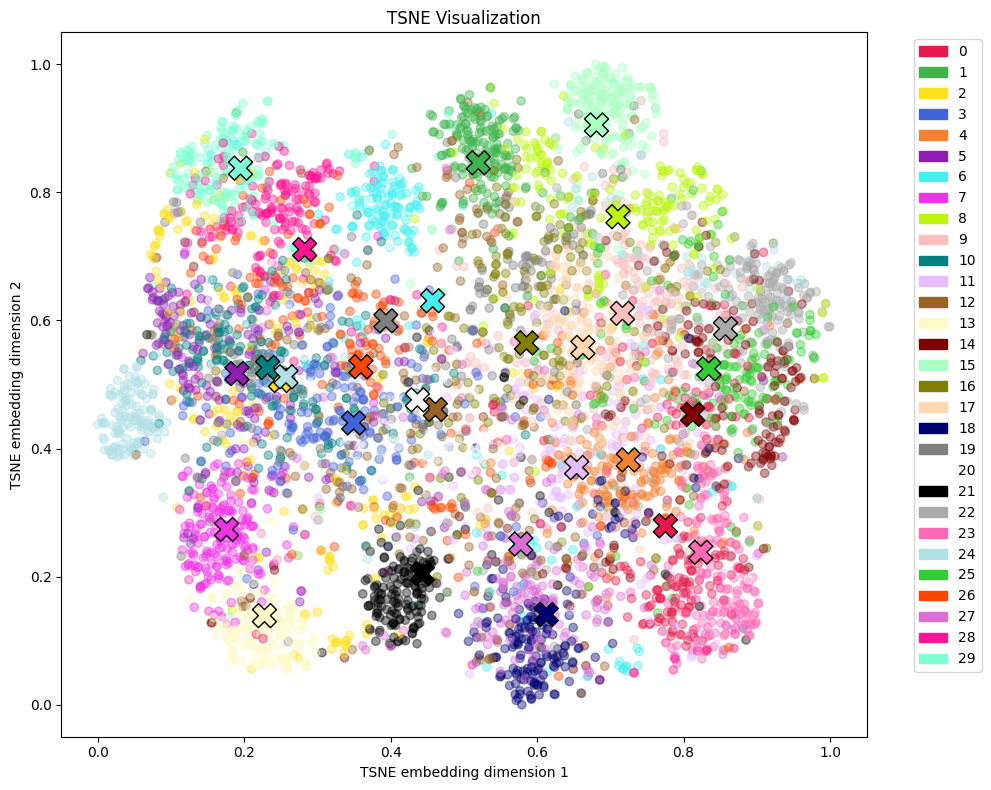

In [49]:
plot_tsne(train_reduced_normalized,
          cmap,
          labels_encoded,
          handles=handles,
          alpha=0.4,
          title="TSNE Visualization",
          xlabel="TSNE embedding dimension 1",
          ylabel="TSNE embedding dimension 2",
          centroids=centroids)

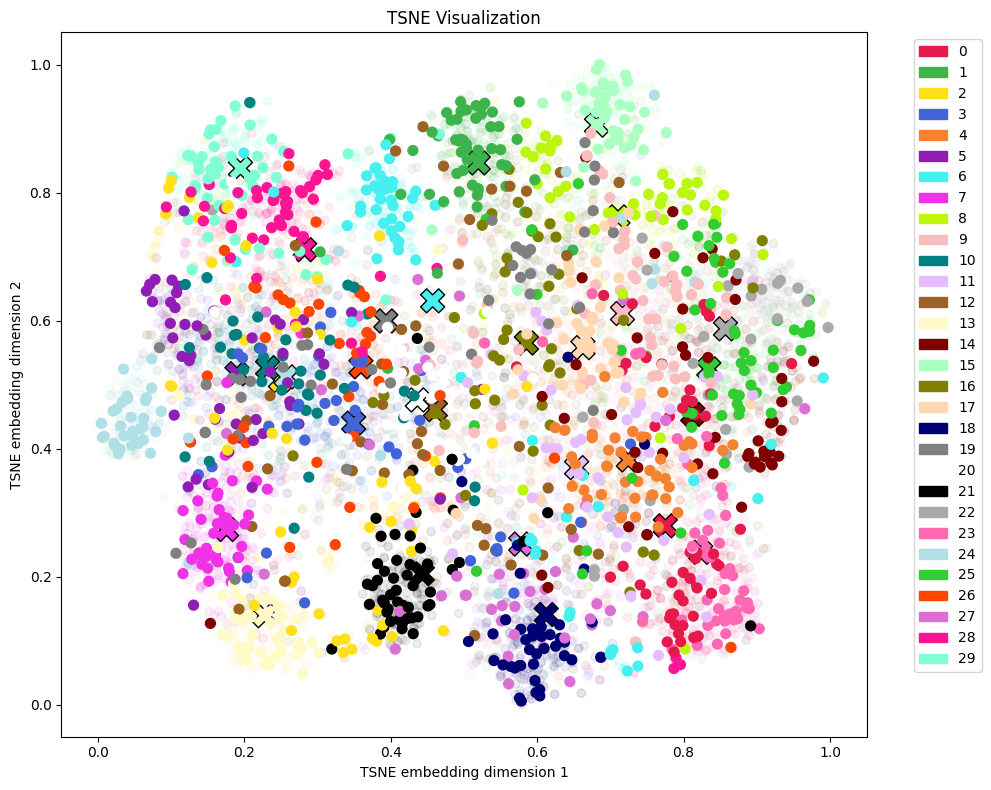

In [51]:
plot_tsne(train_reduced_normalized,
          cmap,
          labels_encoded,
          handles=handles,
          alpha=0.07,
          title="TSNE Visualization",
          xlabel="TSNE embedding dimension 1",
          ylabel="TSNE embedding dimension 2",
          centroids=centroids,
          test_embeddings=test_reduced_normalized,
          test_labels=test_labels_encoded)